<a href="https://colab.research.google.com/github/pinaki1889/QR-code-/blob/master/covid19_vaccine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Module

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the CSV File

> Indented block



In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_vaccine_statewise.csv to covid_vaccine_statewise.csv


#View Dataset

In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['covid_vaccine_statewise.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df2.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           5328 non-null   object 
 1   State                                5328 non-null   object 
 2   Total Individuals Vaccinated         5288 non-null   float64
 3   Total Sessions Conducted             5288 non-null   float64
 4   Total Sites                          5288 non-null   float64
 5   First Dose Administered              5288 non-null   float64
 6   Second Dose Administered             5288 non-null   float64
 7   Male(Individuals Vaccinated)         5288 non-null   float64
 8   Female(Individuals Vaccinated)       5288 non-null   float64
 9   Transgender(Individuals Vaccinated)  5288 non-null   float64
 10  Total Covaxin Administered           5288 non-null   float64
 11  Total CoviShield Administered 

In [6]:
df2.nunique()

Updated On                              144
State                                    37
Total Individuals Vaccinated           5049
Total Sessions Conducted               4268
Total Sites                            2434
First Dose Administered                5048
Second Dose Administered               3972
Male(Individuals Vaccinated)           5009
Female(Individuals Vaccinated)         4993
Transgender(Individuals Vaccinated)    1195
Total Covaxin Administered             2779
Total CoviShield Administered          5051
Total Sputnik V Administered             59
AEFI                                   1065
18-45 years (Age)                      3069
45-60 years (Age)                      3074
60+ years (Age)                        3063
Total Doses Administered               5057
dtype: int64

In [7]:
df2.isnull().values.any()

True

In [8]:
#remove null
df2.isnull().sum().sum()

14000

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Heatmap of Dataset

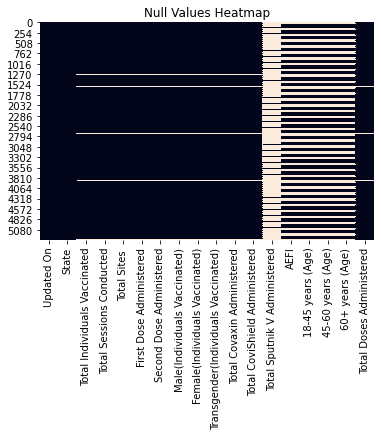

In [10]:
sns.heatmap(df2.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [11]:
df2.isnull().sum()

Updated On                                0
State                                     0
Total Individuals Vaccinated             40
Total Sessions Conducted                 40
Total Sites                              40
First Dose Administered                  40
Second Dose Administered                 40
Male(Individuals Vaccinated)             40
Female(Individuals Vaccinated)           40
Transgender(Individuals Vaccinated)      40
Total Covaxin Administered               40
Total CoviShield Administered            40
Total Sputnik V Administered           4666
AEFI                                   2221
18-45 years (Age)                      2226
45-60 years (Age)                      2225
60+ years (Age)                        2225
Total Doses Administered                 37
dtype: int64

In [12]:
df2 = df2[df2.State != 'India']

In [44]:
df2.shape

(5184, 17)

In [13]:
df2.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
144,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
145,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
146,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
147,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
148,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0


In [14]:
df2.isnull().any()

Updated On                             False
State                                  False
Total Individuals Vaccinated            True
Total Sessions Conducted                True
Total Sites                             True
First Dose Administered                 True
Second Dose Administered                True
Male(Individuals Vaccinated)            True
Female(Individuals Vaccinated)          True
Transgender(Individuals Vaccinated)     True
Total Covaxin Administered              True
Total CoviShield Administered           True
Total Sputnik V Administered            True
AEFI                                    True
18-45 years (Age)                       True
45-60 years (Age)                       True
60+ years (Age)                         True
Total Doses Administered                True
dtype: bool

In [15]:
df2 = df2.drop('Updated On', 1)

In [16]:
df2.head()

,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
144,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
145,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
146,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
147,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
148,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0


In [17]:
print(df2['State'].unique())

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [18]:
df2.sort_values(by = 'Male(Individuals Vaccinated)', ascending = False).head(50)

,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
3166,Maharashtra,19597498.0,1105629.0,4274.0,19597498.0,4852866.0,10524604.0,9070141.0,2753.0,3012896.0,21437286.0,182.0,3992.0,4099403.0,8506028.0,6982959.0,24450364.0
3165,Maharashtra,19360252.0,572555.0,1665.0,19360252.0,4785180.0,10392910.0,8964619.0,2723.0,2954409.0,21190978.0,45.0,3976.0,3974009.0,8434398.0,6943523.0,24145432.0
3164,Maharashtra,19278027.0,1178249.0,4169.0,19278027.0,4771520.0,10347927.0,8927387.0,2713.0,2944627.0,21104916.0,4.0,3976.0,3914131.0,8419751.0,6936344.0,24049547.0
3163,Maharashtra,18959397.0,1245247.0,4606.0,18959397.0,4728102.0,10171294.0,8785443.0,2660.0,2901616.0,20785883.0,0.0,3970.0,3751630.0,8320220.0,6880500.0,23687499.0
3162,Maharashtra,18623132.0,937360.0,3317.0,18623132.0,4679713.0,9988824.0,8631777.0,2531.0,2858281.0,20444564.0,0.0,3966.0,3602549.0,8204069.0,6810254.0,23302845.0
3161,Maharashtra,18425383.0,908083.0,3407.0,18425383.0,4651863.0,9877266.0,8545617.0,2500.0,2827279.0,20249967.0,0.0,3964.0,3479564.0,8155926.0,6784126.0,23077246.0
3160,Maharashtra,18233839.0,942810.0,3661.0,18233839.0,4616425.0,9771250.0,8460113.0,2476.0,2785405.0,20064859.0,0.0,3961.0,3364947.0,8106539.0,6756872.0,22850264.0
5038,Uttar Pradesh,17079924.0,1286409.0,6626.0,17079924.0,3655870.0,9770940.0,7304716.0,4268.0,2403994.0,18331800.0,0.0,1205.0,4618418.0,7140860.0,5313534.0,20735794.0
3159,Maharashtra,18016877.0,976894.0,4069.0,18016877.0,4569743.0,9651880.0,8362542.0,2455.0,2732312.0,19854308.0,0.0,3952.0,3254156.0,8040667.0,6716914.0,22586620.0
3158,Maharashtra,17787436.0,563853.0,1989.0,17787436.0,4532220.0,9527858.0,8257161.0,2417.0,2691236.0,19628420.0,0.0,3931.0,3154007.0,7960373.0,6668322.0,22319656.0


In [19]:
df2.rename(columns={'Male(Individuals Vaccinated)': 'male_vaccinated'}, inplace=True)
df2.rename(columns={'Female(Individuals Vaccinated)': 'female_vaccinated'}, inplace=True)
df2.rename(columns={'Transgender(Individuals Vaccinated)': 'transgender_vaccinated'}, inplace=True)
df2.rename(columns={'Total Covaxin Administered': 'covaxin'}, inplace=True)
df2.rename(columns={'Total CoviShield Administered': 'covishild'}, inplace=True)


In [20]:
df2.head()


,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,male_vaccinated,female_vaccinated,transgender_vaccinated,covaxin,covishild,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
144,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
145,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
146,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
147,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
148,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0


#Vaccination Count

In [21]:
male_vacinated = df2.male_vaccinated.sum()
print(male_vacinated)
female_vacinated = df2.female_vaccinated.sum()#covaxin	covishild
print(female_vacinated)
transgender_vacinated = df2.transgender_vaccinated.sum()
print(transgender_vacinated)

5159672324.0
4632367947.0
1329502.0


#Covaxin and Covishield Count

In [22]:
 covaxin = df2.covaxin.sum()
print(covaxin)
 covishild = df2.covishild.sum()
print(covishild)

1176665120.0
10693261892.0


#The Bar Graph of  Vaccnition of Male, Female and Transgender: 

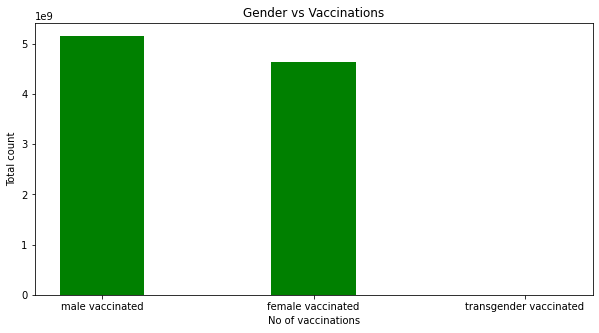

In [23]:
# creating the dataset
data = {'male vaccinated':male_vacinated, 'female vaccinated':female_vacinated, 'transgender vaccinated':transgender_vacinated,}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("No of vaccinations")
plt.ylabel("Total count")
plt.title("Gender vs Vaccinations")
plt.show()

#Pychart of Total No of Vaccinated people (devided by Gender):

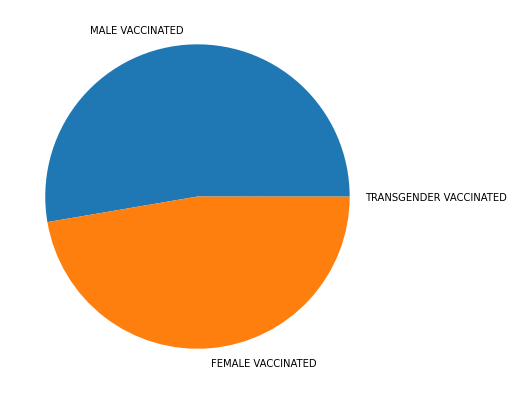

In [24]:
  
# Creating dataset
vaccine = ['MALE VACCINATED', 'FEMALE VACCINATED', 'TRANSGENDER VACCINATED']
  
data = [male_vacinated,female_vacinated,transgender_vacinated]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = vaccine)
  
# show plot
plt.show()

In [25]:
df2.rename(columns={'Second Dose Administered': 'second_dose_vaccinated'}, inplace=True)
df2.rename(columns={'First Dose Administered': 'first_dose_vaccinated'}, inplace=True)

In [26]:
df2.head()

,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,first_dose_vaccinated,second_dose_vaccinated,male_vaccinated,female_vaccinated,transgender_vaccinated,covaxin,covishild,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
144,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
145,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
146,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
147,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
148,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0


#The Percentage of Vaccinate People in India: 

In [27]:
total_cn = 1393126011
percentage = (45129717	/total_cn)*100
print(percentage)



3.2394569223214367


In [28]:
df2.tail()

,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,first_dose_vaccinated,second_dose_vaccinated,male_vaccinated,female_vaccinated,transgender_vaccinated,covaxin,covishild,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
5323,West Bengal,11795260.0,937852.0,2500.0,11795260.0,3931230.0,6615547.0,5178013.0,1700.0,1749972.0,13976518.0,0.0,1210.0,2874071.0,4810523.0,4107132.0,15726490.0
5324,West Bengal,12090072.0,981547.0,2517.0,12090072.0,3941080.0,6784722.0,5303588.0,1762.0,1806377.0,14224775.0,0.0,1211.0,2999339.0,4927157.0,4159589.0,16031152.0
5325,West Bengal,12206706.0,479793.0,1016.0,12206706.0,3943243.0,6851075.0,5353848.0,1783.0,1825771.0,14324178.0,0.0,1214.0,3058135.0,4968447.0,4175911.0,16149949.0
5326,West Bengal,12492937.0,1062959.0,2523.0,12492937.0,3960942.0,7014307.0,5476794.0,1836.0,1878776.0,14575103.0,0.0,1223.0,3174029.0,5087762.0,4226545.0,16453879.0
5327,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


#The Pichart of covaxine and covishild Vaccination:

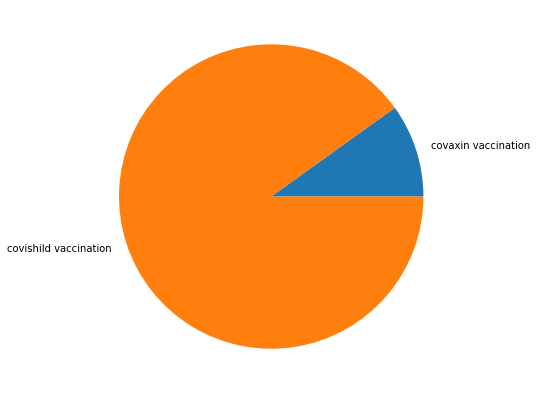

In [29]:
  
# Creating dataset
#covaxin	covishild

vaccine = ['covaxin vaccination','covishild vaccination']
  
data = [covaxin,covishild]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = vaccine)
  
# show plot
plt.show()

In [30]:
df2.head()


,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,first_dose_vaccinated,second_dose_vaccinated,male_vaccinated,female_vaccinated,transgender_vaccinated,covaxin,covishild,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
144,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
145,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
146,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
147,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
148,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0


In [31]:
df2.shape

(5184, 17)

In [32]:
df2.describe()


,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,first_dose_vaccinated,second_dose_vaccinated,male_vaccinated,female_vaccinated,transgender_vaccinated,covaxin,covishild,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
count,5.145000e+03,5.145000e+03,5145.000000,5.145000e+03,5.145000e+03,5.145000e+03,5.145000e+03,5145.000000,5.145000e+03,5.145000e+03,644.000000,3023.000000,3.018000e+03,3.019000e+03,3.019000e+03,5.148000e+03
mean,1.903473e+06,1.420412e+05,1218.239845,1.896530e+06,4.189360e+05,1.002852e+06,9.003631e+05,258.406608,2.287007e+05,2.078379e+06,222.832298,524.705921,4.863737e+05,1.328958e+06,1.262135e+06,2.314073e+06
std,3.186662e+06,2.439091e+05,1623.980985,3.188282e+06,7.956125e+05,1.696028e+06,1.496647e+06,468.901040,4.499504e+05,3.545711e+06,1603.686480,735.212165,6.704086e+05,1.647839e+06,1.517901e+06,3.951838e+06
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,0.000000,0.000000,1.059000e+03,1.136000e+03,5.580000e+02,0.000000e+00
25%,5.744600e+04,2.728000e+03,65.000000,5.648900e+04,2.080000e+03,3.005800e+04,2.572100e+04,2.000000,0.000000e+00,6.449500e+04,0.000000,85.000000,3.983450e+04,8.346450e+04,5.149400e+04,6.450550e+04
50%,2.917180e+05,1.401200e+04,531.000000,2.892550e+05,5.195300e+04,1.452650e+05,1.438320e+05,31.000000,5.580000e+02,3.172660e+05,0.000000,266.000000,2.426755e+05,6.251710e+05,7.099360e+05,3.345935e+05
75%,2.398567e+06,1.717000e+05,1636.000000,2.393775e+06,4.616780e+05,1.295951e+06,1.107988e+06,304.000000,2.215210e+05,2.614021e+06,0.000000,592.000000,6.430350e+05,2.153356e+06,1.919856e+06,2.870493e+06
max,1.959750e+07,1.680845e+06,9947.000000,1.959750e+07,4.852866e+06,1.052460e+07,9.070141e+06,4268.000000,3.012896e+06,2.143729e+07,14852.000000,3992.000000,4.618418e+06,8.506028e+06,6.982959e+06,2.445036e+07


In [33]:
df2.nunique()


State                             36
Total Individuals Vaccinated    4907
Total Sessions Conducted        4126
Total Sites                     2292
first_dose_vaccinated           4906
second_dose_vaccinated          3860
male_vaccinated                 4867
female_vaccinated               4853
transgender_vaccinated          1085
covaxin                         2639
covishild                       4909
Total Sputnik V Administered      41
AEFI                             981
18-45 years (Age)               2985
45-60 years (Age)               2990
60+ years (Age)                 2979
Total Doses Administered        4915
dtype: int64

In [34]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['covid_vaccine_statewise.csv']))

In [35]:
df1 = df1[df1.State == 'India']

In [36]:
df1.tail()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
139,04/06/2021,India,179205337.0,13131165.0,46141.0,179205337.0,44436944.0,96289872.0,82885972.0,29493.0,25581498.0,198045267.0,15516.0,21518.0,42587253.0,75746331.0,60810517.0,223642281.0
140,05/06/2021,India,182451348.0,12775190.0,45548.0,182451348.0,44711155.0,98143570.0,84277549.0,30229.0,26213604.0,200932620.0,16279.0,21637.0,44490432.0,76694765.0,61200972.0,227162503.0
141,06/06/2021,India,183824958.0,7228531.0,24346.0,183824958.0,44799620.0,98907905.0,84886553.0,30500.0,26450908.0,202156935.0,16735.0,21706.0,45391190.0,77035519.0,61331191.0,228624578.0
142,07/06/2021,India,186933771.0,12625429.0,45459.0,186933771.0,45129717.0,100656406.0,86246094.0,31271.0,27031124.0,205014564.0,17800.0,21820.0,47233720.0,77930082.0,61699177.0,232063488.0
143,08/06/2021,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df1.isnull().sum().sum()

377

In [38]:
df1.isnull().values.any()


True

In [39]:
df1.shape

(144, 18)

In [40]:
df1.rename(columns={'Second Dose Administered': 'second_dose_vaccinated'}, inplace=True)
df1.rename(columns={'First Dose Administered': 'first_dose_vaccinated'}, inplace=True)

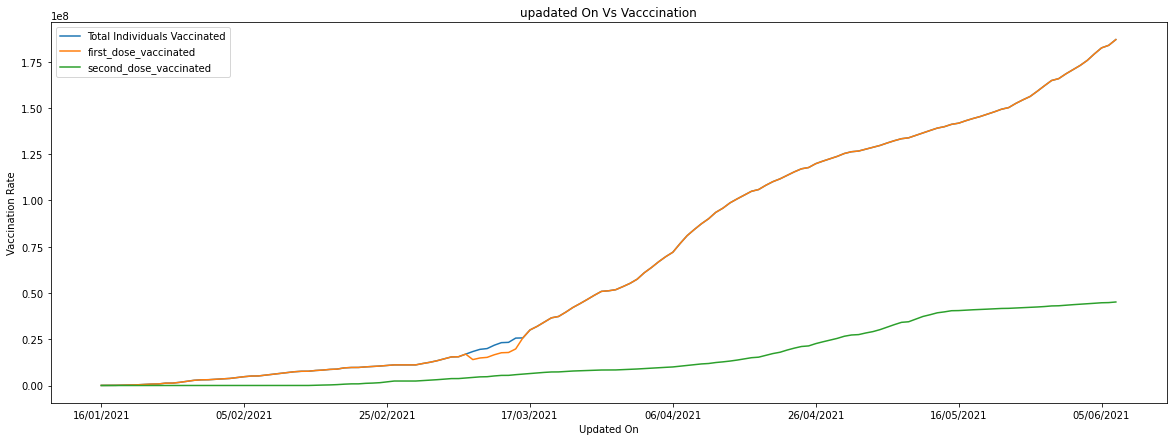

In [41]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(100, 7))
df1.plot(x="Updated On", y=["Total Individuals Vaccinated","first_dose_vaccinated","second_dose_vaccinated"],figsize =(20, 7), fontsize=10)
plt.xlabel("Updated On")
plt.ylabel("Vaccination Rate")
plt.title("upadated On Vs Vacccination")
plt.show()

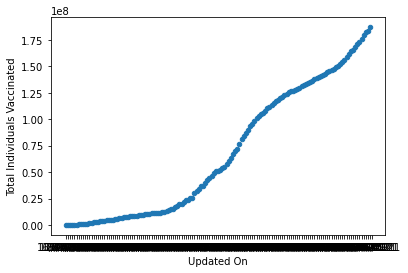

In [42]:
df1.plot(x="Updated On", y="Total Individuals Vaccinated", kind="scatter")
#<AxesSubplot:xlabel='Updated On', ylabel='Total Individuals Vaccinated'>